# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 18:52:23.026681: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T18:52:26.181643
2025-04-14 18:52:26.181643


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 18:52:19"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

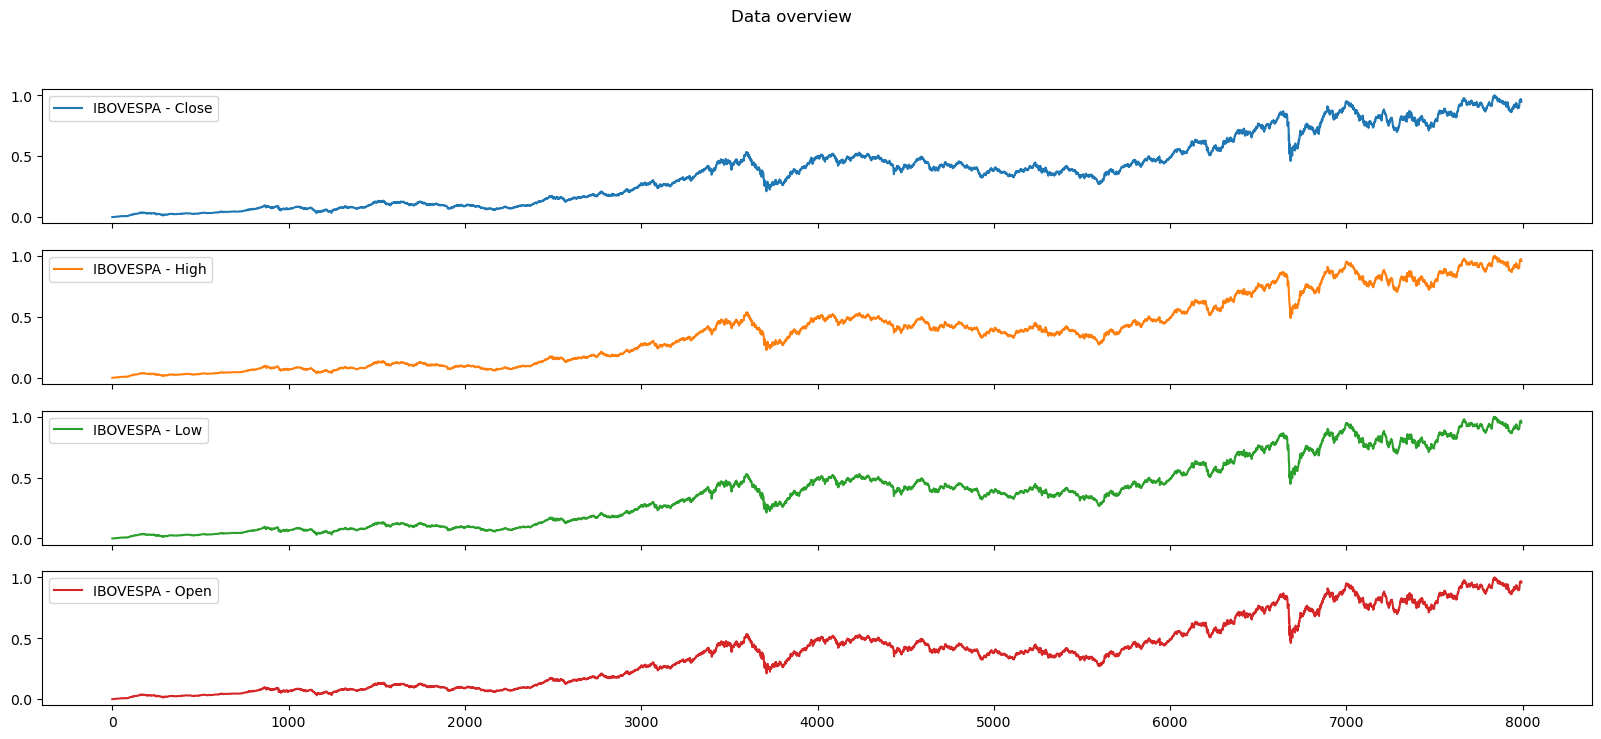

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

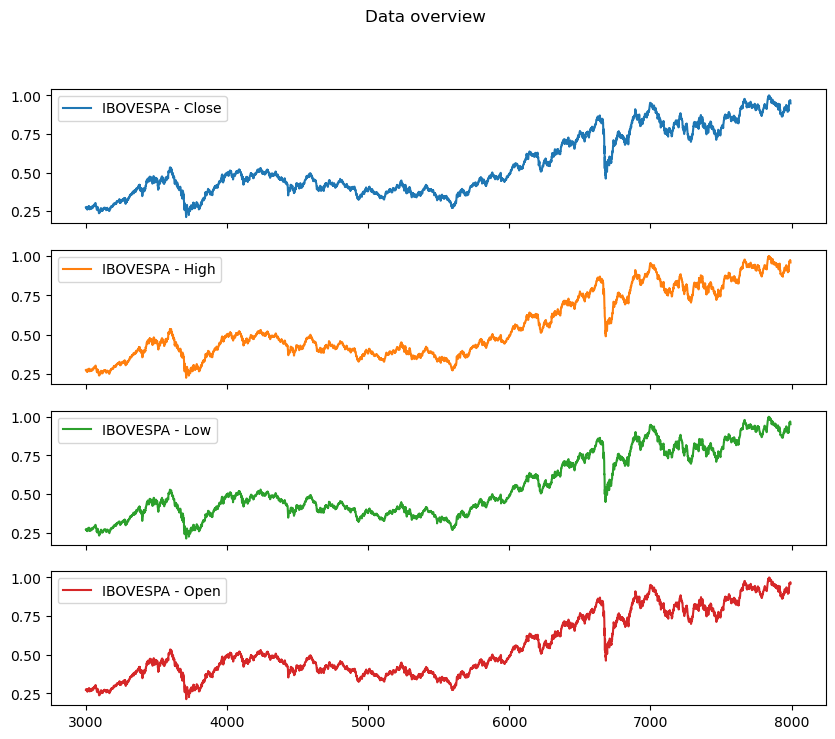

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

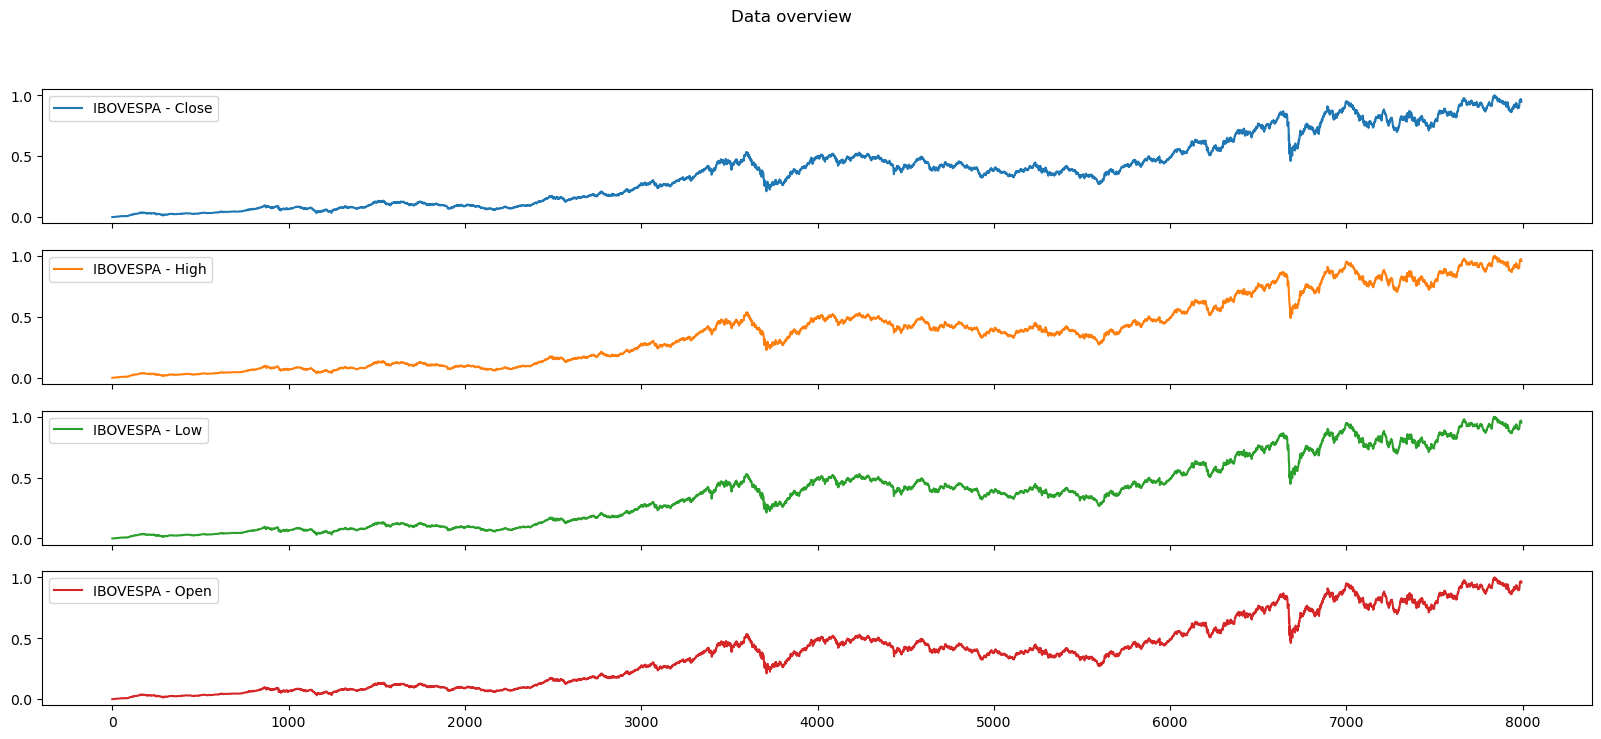

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

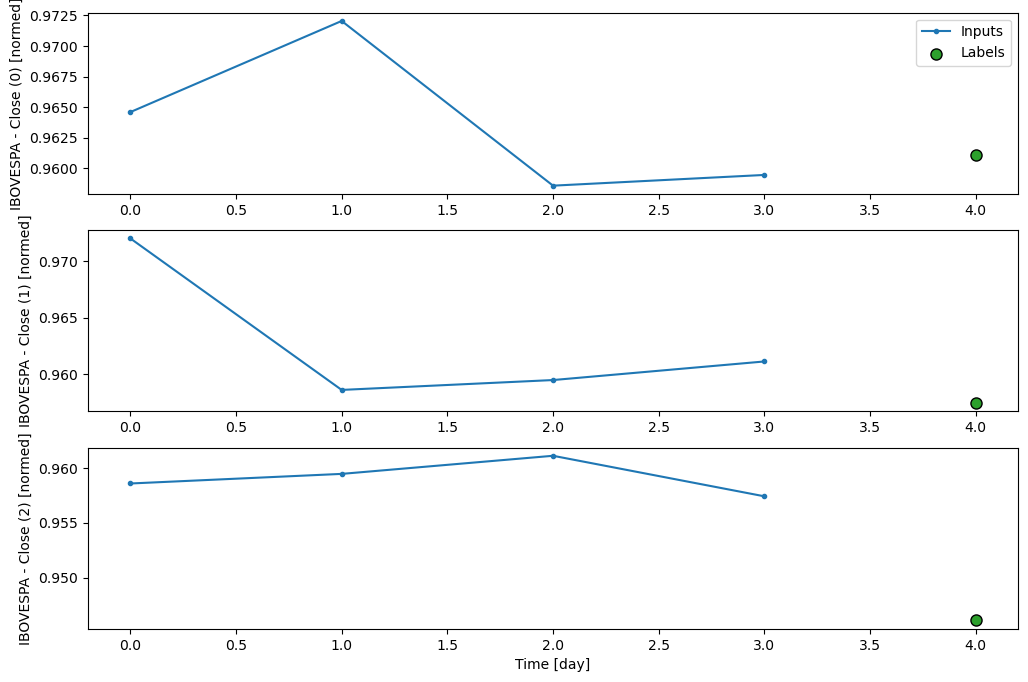

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

4

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:19 2s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 61.2408 - mean_squared_error: 1.4489e-04 - root_mean_squared_error: 0.0107  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 52.3389 - mean_squared_error: 1.5849e-04 - root_mean_squared_error: 0.0119

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 45.7405 - mean_squared_error: 1.5975e-04 - root_mean_squared_error: 0.0122

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.9237 - mean_squared_error: 1.8381e-04 - root_mean_squared_error: 0.0131

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 39.2078 - mean_squared_error: 2.1347e-04 - root_mean_squared_error: 0.0141

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 37.4646 - mean_squared_error: 2.2611e-04 - root_mean_squared_error: 0.0146

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 36.1993 - mean_squared_error: 2.3862e-04 - root_mean_squared_error: 0.0150

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 35.0367 - mean_squared_error: 2.6190e-04 - root_mean_squared_error: 0.0157

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 34.0954 - mean_squared_error: 2.8151e-04 - root_mean_squared_error: 0.0162

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 32.9732 - mean_squared_error: 3.0244e-04 - root_mean_squared_error: 0.0168

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 31.6489 - mean_squared_error: 3.3688e-04 - root_mean_squared_error: 0.0177

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 30.6139 - mean_squared_error: 4.8098e-04 - root_mean_squared_error: 0.0200

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 29.7490 - mean_squared_error: 6.7664e-04 - root_mean_squared_error: 0.0229

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 29.0206 - mean_squared_error: 8.3447e-04 - root_mean_squared_error: 0.0251

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 28.2985 - mean_squared_error: 9.8172e-04 - root_mean_squared_error: 0.0272

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 27.6472 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290    

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 27.0996 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 26.5888 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 26.0966 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 25.6343 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 25.4250 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366 - val_loss: 0.0354 - val_mean_absolute_error: 0.0354 - val_mean_absolute_percentage_error: 3.7828 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0405


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4538 - mean_absolute_error: 0.4538 - mean_absolute_percentage_error: 21280.3242 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4538

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4167 - mean_absolute_error: 0.4167 - mean_absolute_percentage_error: 7572.6465 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.4195  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3386 - mean_absolute_error: 0.3386 - mean_absolute_percentage_error: 4988.9741 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3608

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 3809.6980 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.3186

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 3118.2148 - mean_squared_error: 0.0909 - root_mean_squared_error: 0.2886

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 2657.2627 - mean_squared_error: 0.0788 - root_mean_squared_error: 0.2659

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1923 - mean_absolute_error: 0.1923 - mean_absolute_percentage_error: 2325.5833 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2480

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 2091.3723 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2345

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 1977.3501 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2276

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1612 - mean_absolute_error: 0.1612 - mean_absolute_percentage_error: 1876.3153 - mean_squared_error: 0.0574 - root_mean_squared_error: 0.2213

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 1716.0671 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2109

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 1583.4143 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2020

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1326 - mean_absolute_error: 0.1326 - mean_absolute_percentage_error: 1471.5959 - mean_squared_error: 0.0458 - root_mean_squared_error: 0.1943

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 1382.7823 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1880

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 1305.0453 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.1824

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 1231.0078 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1768

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 1165.6743 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1718

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1120.3807 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1683

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 1070.8884 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1643

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1022.4326 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1605


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 985.0567 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1576 - val_loss: 0.0175 - val_mean_absolute_error: 0.0175 - val_mean_absolute_percentage_error: 1.9151 - val_mean_squared_error: 5.3875e-04 - val_root_mean_squared_error: 0.0232


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 11160.7695 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2380

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 3896.8672 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.2071  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1610 - mean_absolute_error: 0.1610 - mean_absolute_percentage_error: 2600.6726 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1766

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 1927.3828 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1536

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1596.2231 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1400

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 1387.3478 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1305

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 1219.3950 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1223

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 1081.8745 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1150

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 982.2494 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1093 

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 901.0430 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1045

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 838.6291 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1007

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 776.1574 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0967

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 723.1472 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0932

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 684.1365 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0906

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 646.5338 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0879

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 613.2117 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0855

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 581.1188 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0831

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 552.5095 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0809

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 526.8362 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0789

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 503.6537 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0771


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 496.9680 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0766 - val_loss: 0.0140 - val_mean_absolute_error: 0.0140 - val_mean_absolute_percentage_error: 1.4957 - val_mean_squared_error: 2.9361e-04 - val_root_mean_squared_error: 0.0171


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 837.5507 - mean_squared_error: 3.2162e-04 - root_mean_squared_error: 0.0179

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 253.9921 - mean_squared_error: 1.1346e-04 - root_mean_squared_error: 0.0101 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 155.5595 - mean_squared_error: 7.2615e-05 - root_mean_squared_error: 0.0079

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 115.8558 - mean_squared_error: 5.6500e-05 - root_mean_squared_error: 0.0069

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 95.4518 - mean_squared_error: 5.0809e-05 - root_mean_squared_error: 0.0067 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 81.0197 - mean_squared_error: 4.8612e-05 - root_mean_squared_error: 0.0066

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 70.9194 - mean_squared_error: 4.7248e-05 - root_mean_squared_error: 0.0065

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 63.3428 - mean_squared_error: 4.5802e-05 - root_mean_squared_error: 0.0065

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 57.3960 - mean_squared_error: 4.4392e-05 - root_mean_squared_error: 0.0064

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 52.5869 - mean_squared_error: 4.3418e-05 - root_mean_squared_error: 0.0064

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 48.6179 - mean_squared_error: 4.3506e-05 - root_mean_squared_error: 0.0064

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 45.2717 - mean_squared_error: 4.3644e-05 - root_mean_squared_error: 0.0064

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 42.4096 - mean_squared_error: 4.3891e-05 - root_mean_squared_error: 0.0065

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.9317 - mean_squared_error: 4.4197e-05 - root_mean_squared_error: 0.0065

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 37.9206 - mean_squared_error: 4.4497e-05 - root_mean_squared_error: 0.0065

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 36.4152 - mean_squared_error: 4.4930e-05 - root_mean_squared_error: 0.0066

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 34.6519 - mean_squared_error: 4.5760e-05 - root_mean_squared_error: 0.0066

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 33.1950 - mean_squared_error: 4.8954e-05 - root_mean_squared_error: 0.0068

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 31.7803 - mean_squared_error: 5.9257e-05 - root_mean_squared_error: 0.0073


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 30.5994 - mean_squared_error: 7.1134e-05 - root_mean_squared_error: 0.0078 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 1.3563 - val_mean_squared_error: 2.3846e-04 - val_root_mean_squared_error: 0.0154


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 2572.6448 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0548

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 842.5423 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 543.6934 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 412.0939 - mean_squared_error: 9.1537e-04 - root_mean_squared_error: 0.0289

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 336.6511 - mean_squared_error: 7.7355e-04 - root_mean_squared_error: 0.0263

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 286.7282 - mean_squared_error: 6.7523e-04 - root_mean_squared_error: 0.0244

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 251.0989 - mean_squared_error: 6.0363e-04 - root_mean_squared_error: 0.0230

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 224.1674 - mean_squared_error: 5.4846e-04 - root_mean_squared_error: 0.0218

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 203.0138 - mean_squared_error: 5.0668e-04 - root_mean_squared_error: 0.0209

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 185.8937 - mean_squared_error: 4.7459e-04 - root_mean_squared_error: 0.0202

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 171.7403 - mean_squared_error: 4.5258e-04 - root_mean_squared_error: 0.0198

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 160.6713 - mean_squared_error: 4.3943e-04 - root_mean_squared_error: 0.0196

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 150.3454 - mean_squared_error: 4.2668e-04 - root_mean_squared_error: 0.0194

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 141.3933 - mean_squared_error: 4.1444e-04 - root_mean_squared_error: 0.0191

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 134.1191 - mean_squared_error: 4.0369e-04 - root_mean_squared_error: 0.0189

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 127.6296 - mean_squared_error: 3.9347e-04 - root_mean_squared_error: 0.0187

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 121.3411 - mean_squared_error: 3.8314e-04 - root_mean_squared_error: 0.0185

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 116.1175 - mean_squared_error: 3.7490e-04 - root_mean_squared_error: 0.0183

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 111.3712 - mean_squared_error: 3.6790e-04 - root_mean_squared_error: 0.0182


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 107.7334 - mean_squared_error: 3.6253e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8135 - val_mean_squared_error: 8.9582e-05 - val_root_mean_squared_error: 0.0095


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 1206.0249 - mean_squared_error: 6.5967e-04 - root_mean_squared_error: 0.0257

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 381.3699 - mean_squared_error: 3.3163e-04 - root_mean_squared_error: 0.0179  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 245.9148 - mean_squared_error: 2.4402e-04 - root_mean_squared_error: 0.0152

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 186.6538 - mean_squared_error: 1.9604e-04 - root_mean_squared_error: 0.0135

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 154.4834 - mean_squared_error: 1.6739e-04 - root_mean_squared_error: 0.0123

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 131.1562 - mean_squared_error: 1.4571e-04 - root_mean_squared_error: 0.0114

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 114.5390 - mean_squared_error: 1.2962e-04 - root_mean_squared_error: 0.0107

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 102.0331 - mean_squared_error: 1.1735e-04 - root_mean_squared_error: 0.0101

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 92.2535 - mean_squared_error: 1.0823e-04 - root_mean_squared_error: 0.0097 

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 84.3704 - mean_squared_error: 1.0178e-04 - root_mean_squared_error: 0.0094

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 77.8778 - mean_squared_error: 9.8394e-05 - root_mean_squared_error: 0.0093

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 72.4213 - mean_squared_error: 9.6621e-05 - root_mean_squared_error: 0.0092

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 67.4326 - mean_squared_error: 9.5569e-05 - root_mean_squared_error: 0.0092

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 63.7307 - mean_squared_error: 9.4670e-05 - root_mean_squared_error: 0.0092

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 60.7177 - mean_squared_error: 9.3950e-05 - root_mean_squared_error: 0.0092

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 57.7764 - mean_squared_error: 9.3272e-05 - root_mean_squared_error: 0.0092

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 54.9306 - mean_squared_error: 9.2743e-05 - root_mean_squared_error: 0.0092

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 52.5706 - mean_squared_error: 9.3155e-05 - root_mean_squared_error: 0.0093

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 50.2599 - mean_squared_error: 9.4485e-05 - root_mean_squared_error: 0.0093


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 48.6329 - mean_squared_error: 9.5753e-05 - root_mean_squared_error: 0.0094 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.2597 - val_mean_squared_error: 2.0250e-04 - val_root_mean_squared_error: 0.0142


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 2478.7188 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0528

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 791.0272 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 523.8048 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 401.2238 - mean_squared_error: 9.2333e-04 - root_mean_squared_error: 0.0291

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 329.1209 - mean_squared_error: 7.7811e-04 - root_mean_squared_error: 0.0264

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 284.1211 - mean_squared_error: 6.8375e-04 - root_mean_squared_error: 0.0246

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 248.6361 - mean_squared_error: 6.0701e-04 - root_mean_squared_error: 0.0230

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 221.7956 - mean_squared_error: 5.4783e-04 - root_mean_squared_error: 0.0217

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 200.6909 - mean_squared_error: 5.0080e-04 - root_mean_squared_error: 0.0206

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 183.6099 - mean_squared_error: 4.6299e-04 - root_mean_squared_error: 0.0197

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 169.4853 - mean_squared_error: 4.3313e-04 - root_mean_squared_error: 0.0190

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 158.4322 - mean_squared_error: 4.1043e-04 - root_mean_squared_error: 0.0185

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 148.1330 - mean_squared_error: 3.8964e-04 - root_mean_squared_error: 0.0180

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 139.2153 - mean_squared_error: 3.7139e-04 - root_mean_squared_error: 0.0176

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 131.4123 - mean_squared_error: 3.5531e-04 - root_mean_squared_error: 0.0172

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 125.0228 - mean_squared_error: 3.4213e-04 - root_mean_squared_error: 0.0169

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 118.8338 - mean_squared_error: 3.2951e-04 - root_mean_squared_error: 0.0166

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 113.6984 - mean_squared_error: 3.2135e-04 - root_mean_squared_error: 0.0164

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 109.0386 - mean_squared_error: 3.1736e-04 - root_mean_squared_error: 0.0163


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 105.8161 - mean_squared_error: 3.1594e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0237 - val_mean_absolute_error: 0.0237 - val_mean_absolute_percentage_error: 2.5265 - val_mean_squared_error: 6.6564e-04 - val_root_mean_squared_error: 0.0258


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 2178.3745 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 697.0005 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 475.8129 - mean_squared_error: 9.5733e-04 - root_mean_squared_error: 0.0303

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 363.3278 - mean_squared_error: 7.7795e-04 - root_mean_squared_error: 0.0270

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 301.7883 - mean_squared_error: 6.6927e-04 - root_mean_squared_error: 0.0248

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 256.9446 - mean_squared_error: 5.8610e-04 - root_mean_squared_error: 0.0231

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 224.8981 - mean_squared_error: 5.2401e-04 - root_mean_squared_error: 0.0217

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 200.6996 - mean_squared_error: 4.7615e-04 - root_mean_squared_error: 0.0205

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 181.6969 - mean_squared_error: 4.3866e-04 - root_mean_squared_error: 0.0196

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 167.4123 - mean_squared_error: 4.1191e-04 - root_mean_squared_error: 0.0190

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 154.5438 - mean_squared_error: 3.9178e-04 - root_mean_squared_error: 0.0185

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 143.7301 - mean_squared_error: 3.7921e-04 - root_mean_squared_error: 0.0183

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 134.4840 - mean_squared_error: 3.6822e-04 - root_mean_squared_error: 0.0181

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 128.2242 - mean_squared_error: 3.6007e-04 - root_mean_squared_error: 0.0179

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 122.0476 - mean_squared_error: 3.5150e-04 - root_mean_squared_error: 0.0177

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 116.0223 - mean_squared_error: 3.4259e-04 - root_mean_squared_error: 0.0175

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 111.0510 - mean_squared_error: 3.3485e-04 - root_mean_squared_error: 0.0174

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 105.7532 - mean_squared_error: 3.2650e-04 - root_mean_squared_error: 0.0172

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 101.3382 - mean_squared_error: 3.1980e-04 - root_mean_squared_error: 0.0170

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 97.3149 - mean_squared_error: 3.1389e-04 - root_mean_squared_error: 0.0169 


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 96.0523 - mean_squared_error: 3.1204e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 1.3838 - val_mean_squared_error: 2.2619e-04 - val_root_mean_squared_error: 0.0150


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 550.5155 - mean_squared_error: 1.3699e-04 - root_mean_squared_error: 0.0117

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 171.3060 - mean_squared_error: 8.9662e-05 - root_mean_squared_error: 0.0094 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 112.4820 - mean_squared_error: 7.2551e-05 - root_mean_squared_error: 0.0084

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 88.0544 - mean_squared_error: 6.2765e-05 - root_mean_squared_error: 0.0078 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 72.3692 - mean_squared_error: 5.5387e-05 - root_mean_squared_error: 0.0073

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 61.9623 - mean_squared_error: 5.0030e-05 - root_mean_squared_error: 0.0069

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 54.5082 - mean_squared_error: 4.5889e-05 - root_mean_squared_error: 0.0066

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 48.8674 - mean_squared_error: 4.2796e-05 - root_mean_squared_error: 0.0064

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 44.4248 - mean_squared_error: 4.0589e-05 - root_mean_squared_error: 0.0062

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 41.0735 - mean_squared_error: 3.9442e-05 - root_mean_squared_error: 0.0061

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 38.0527 - mean_squared_error: 3.9766e-05 - root_mean_squared_error: 0.0062

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 35.6875 - mean_squared_error: 4.0549e-05 - root_mean_squared_error: 0.0062

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 33.4832 - mean_squared_error: 4.1726e-05 - root_mean_squared_error: 0.0063

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 31.7102 - mean_squared_error: 4.2708e-05 - root_mean_squared_error: 0.0064

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 30.2661 - mean_squared_error: 4.3530e-05 - root_mean_squared_error: 0.0065

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 28.7451 - mean_squared_error: 4.4427e-05 - root_mean_squared_error: 0.0065

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 27.4899 - mean_squared_error: 4.5266e-05 - root_mean_squared_error: 0.0066

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 26.2667 - mean_squared_error: 4.6724e-05 - root_mean_squared_error: 0.0067

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 25.1652 - mean_squared_error: 4.8996e-05 - root_mean_squared_error: 0.0069


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 24.2406 - mean_squared_error: 5.1400e-05 - root_mean_squared_error: 0.0070 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 1.4326 - val_mean_squared_error: 2.4625e-04 - val_root_mean_squared_error: 0.0157


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 2398.8159 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 760.8876 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 498.2401 - mean_squared_error: 9.7496e-04 - root_mean_squared_error: 0.0299

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 380.1853 - mean_squared_error: 7.6756e-04 - root_mean_squared_error: 0.0261

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 315.4857 - mean_squared_error: 6.4848e-04 - root_mean_squared_error: 0.0237

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 268.1878 - mean_squared_error: 5.5868e-04 - root_mean_squared_error: 0.0218

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 234.3358 - mean_squared_error: 4.9296e-04 - root_mean_squared_error: 0.0203

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 212.2921 - mean_squared_error: 4.4961e-04 - root_mean_squared_error: 0.0193

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 192.9442 - mean_squared_error: 4.1137e-04 - root_mean_squared_error: 0.0183

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 177.1397 - mean_squared_error: 3.8039e-04 - root_mean_squared_error: 0.0175

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 163.9701 - mean_squared_error: 3.5577e-04 - root_mean_squared_error: 0.0169

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 154.5500 - mean_squared_error: 3.3887e-04 - root_mean_squared_error: 0.0165

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 146.2582 - mean_squared_error: 3.2427e-04 - root_mean_squared_error: 0.0162

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 138.8980 - mean_squared_error: 3.1151e-04 - root_mean_squared_error: 0.0158

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 131.0787 - mean_squared_error: 2.9782e-04 - root_mean_squared_error: 0.0155

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 123.6374 - mean_squared_error: 2.8479e-04 - root_mean_squared_error: 0.0152

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 117.0735 - mean_squared_error: 2.7321e-04 - root_mean_squared_error: 0.0148

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 111.2356 - mean_squared_error: 2.6301e-04 - root_mean_squared_error: 0.0146

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 106.3938 - mean_squared_error: 2.5644e-04 - root_mean_squared_error: 0.0144

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 101.6532 - mean_squared_error: 2.5248e-04 - root_mean_squared_error: 0.0144


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 98.9628 - mean_squared_error: 2.5065e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8987 - val_mean_squared_error: 1.0260e-04 - val_root_mean_squared_error: 0.0101


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 1947.5923 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0415

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 649.5619 - mean_squared_error: 9.8473e-04 - root_mean_squared_error: 0.0309

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 423.8003 - mean_squared_error: 7.3452e-04 - root_mean_squared_error: 0.0264

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 323.9630 - mean_squared_error: 6.0069e-04 - root_mean_squared_error: 0.0237

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 265.5890 - mean_squared_error: 5.1188e-04 - root_mean_squared_error: 0.0217

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 229.2208 - mean_squared_error: 4.5270e-04 - root_mean_squared_error: 0.0202

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 200.5637 - mean_squared_error: 4.0381e-04 - root_mean_squared_error: 0.0190

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 178.8946 - mean_squared_error: 3.6563e-04 - root_mean_squared_error: 0.0179

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 163.0469 - mean_squared_error: 3.3721e-04 - root_mean_squared_error: 0.0171

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 150.0383 - mean_squared_error: 3.1388e-04 - root_mean_squared_error: 0.0165

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 138.3271 - mean_squared_error: 2.9364e-04 - root_mean_squared_error: 0.0159

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 128.4814 - mean_squared_error: 2.7660e-04 - root_mean_squared_error: 0.0154

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 120.6796 - mean_squared_error: 2.6315e-04 - root_mean_squared_error: 0.0150

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 113.3338 - mean_squared_error: 2.5048e-04 - root_mean_squared_error: 0.0146

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 106.9179 - mean_squared_error: 2.3940e-04 - root_mean_squared_error: 0.0143

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 101.2615 - mean_squared_error: 2.2968e-04 - root_mean_squared_error: 0.0140

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 96.2321 - mean_squared_error: 2.2122e-04 - root_mean_squared_error: 0.0137 

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 92.0610 - mean_squared_error: 2.1567e-04 - root_mean_squared_error: 0.0135

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 87.9789 - mean_squared_error: 2.1309e-04 - root_mean_squared_error: 0.0135


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 85.1062 - mean_squared_error: 2.1263e-04 - root_mean_squared_error: 0.0135 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0910 - val_mean_squared_error: 1.6072e-04 - val_root_mean_squared_error: 0.0127


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 2071.4871 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0442

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 659.7728 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 435.0687 - mean_squared_error: 7.6511e-04 - root_mean_squared_error: 0.0267

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 333.5029 - mean_squared_error: 6.1587e-04 - root_mean_squared_error: 0.0237

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 274.0059 - mean_squared_error: 5.2365e-04 - root_mean_squared_error: 0.0217

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 236.8680 - mean_squared_error: 4.6415e-04 - root_mean_squared_error: 0.0203

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 207.5984 - mean_squared_error: 4.1566e-04 - root_mean_squared_error: 0.0191

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 185.4598 - mean_squared_error: 3.7854e-04 - root_mean_squared_error: 0.0182

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 168.0508 - mean_squared_error: 3.5024e-04 - root_mean_squared_error: 0.0174

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 153.9542 - mean_squared_error: 3.2923e-04 - root_mean_squared_error: 0.0169

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 144.8216 - mean_squared_error: 3.2225e-04 - root_mean_squared_error: 0.0168

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 134.6603 - mean_squared_error: 3.2608e-04 - root_mean_squared_error: 0.0170

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 126.6180 - mean_squared_error: 3.3121e-04 - root_mean_squared_error: 0.0172

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 119.5874 - mean_squared_error: 3.3466e-04 - root_mean_squared_error: 0.0174

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 112.8933 - mean_squared_error: 3.3629e-04 - root_mean_squared_error: 0.0175

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 106.9899 - mean_squared_error: 3.3667e-04 - root_mean_squared_error: 0.0176

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 101.7393 - mean_squared_error: 3.3640e-04 - root_mean_squared_error: 0.0176

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 97.0348 - mean_squared_error: 3.3599e-04 - root_mean_squared_error: 0.0176 

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 93.1031 - mean_squared_error: 3.3540e-04 - root_mean_squared_error: 0.0177


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 89.7994 - mean_squared_error: 3.3465e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1918 - val_mean_squared_error: 1.7759e-04 - val_root_mean_squared_error: 0.0133


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 475.4679 - mean_squared_error: 1.0258e-04 - root_mean_squared_error: 0.0101

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 146.5855 - mean_squared_error: 6.2833e-05 - root_mean_squared_error: 0.0079 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 96.9952 - mean_squared_error: 5.3760e-05 - root_mean_squared_error: 0.0073 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 74.8171 - mean_squared_error: 4.6641e-05 - root_mean_squared_error: 0.0068

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 61.8345 - mean_squared_error: 4.1800e-05 - root_mean_squared_error: 0.0064

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 53.7398 - mean_squared_error: 3.8745e-05 - root_mean_squared_error: 0.0061

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 47.3419 - mean_squared_error: 3.5990e-05 - root_mean_squared_error: 0.0059

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 42.4933 - mean_squared_error: 3.3914e-05 - root_mean_squared_error: 0.0057

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 38.6659 - mean_squared_error: 3.2379e-05 - root_mean_squared_error: 0.0056

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.5550 - mean_squared_error: 3.1583e-05 - root_mean_squared_error: 0.0055

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 32.9805 - mean_squared_error: 3.2037e-05 - root_mean_squared_error: 0.0056

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.8054 - mean_squared_error: 3.2945e-05 - root_mean_squared_error: 0.0056

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 28.9419 - mean_squared_error: 3.4158e-05 - root_mean_squared_error: 0.0058

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 27.3221 - mean_squared_error: 3.5190e-05 - root_mean_squared_error: 0.0058

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 25.9010 - mean_squared_error: 3.6146e-05 - root_mean_squared_error: 0.0059

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 24.6413 - mean_squared_error: 3.6981e-05 - root_mean_squared_error: 0.0060

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 23.5988 - mean_squared_error: 3.7921e-05 - root_mean_squared_error: 0.0061

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 22.5854 - mean_squared_error: 4.1127e-05 - root_mean_squared_error: 0.0063

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 21.6765 - mean_squared_error: 4.7517e-05 - root_mean_squared_error: 0.0066


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 21.2234 - mean_squared_error: 5.1165e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7152 - val_mean_squared_error: 6.6302e-05 - val_root_mean_squared_error: 0.0081


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 1687.0984 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 560.4300 - mean_squared_error: 7.3190e-04 - root_mean_squared_error: 0.0267

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 367.5845 - mean_squared_error: 5.6645e-04 - root_mean_squared_error: 0.0233

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 286.3842 - mean_squared_error: 4.7344e-04 - root_mean_squared_error: 0.0212

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 237.2348 - mean_squared_error: 4.0851e-04 - root_mean_squared_error: 0.0195

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 201.6001 - mean_squared_error: 3.5826e-04 - root_mean_squared_error: 0.0181

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 176.2237 - mean_squared_error: 3.2048e-04 - root_mean_squared_error: 0.0170

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 157.1124 - mean_squared_error: 2.9108e-04 - root_mean_squared_error: 0.0161

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 142.1318 - mean_squared_error: 2.6792e-04 - root_mean_squared_error: 0.0154

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 131.7466 - mean_squared_error: 2.5250e-04 - root_mean_squared_error: 0.0149

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 122.9415 - mean_squared_error: 2.4107e-04 - root_mean_squared_error: 0.0146

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 114.1141 - mean_squared_error: 2.3280e-04 - root_mean_squared_error: 0.0144

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 106.6005 - mean_squared_error: 2.2607e-04 - root_mean_squared_error: 0.0142

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 100.1129 - mean_squared_error: 2.1973e-04 - root_mean_squared_error: 0.0140

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 94.8586 - mean_squared_error: 2.1419e-04 - root_mean_squared_error: 0.0139 

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 90.1848 - mean_squared_error: 2.0895e-04 - root_mean_squared_error: 0.0137

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 85.6668 - mean_squared_error: 2.0366e-04 - root_mean_squared_error: 0.0136

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 81.6255 - mean_squared_error: 1.9903e-04 - root_mean_squared_error: 0.0134

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 77.9875 - mean_squared_error: 1.9514e-04 - root_mean_squared_error: 0.0133


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 74.6936 - mean_squared_error: 1.9171e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8579 - val_mean_squared_error: 9.8370e-05 - val_root_mean_squared_error: 0.0099


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 513.4908 - mean_squared_error: 1.1883e-04 - root_mean_squared_error: 0.0109

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 159.8584 - mean_squared_error: 6.4515e-05 - root_mean_squared_error: 0.0080 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 103.2183 - mean_squared_error: 4.8126e-05 - root_mean_squared_error: 0.0068

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 78.5103 - mean_squared_error: 3.9549e-05 - root_mean_squared_error: 0.0061 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 64.3251 - mean_squared_error: 3.4363e-05 - root_mean_squared_error: 0.0057

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 54.9516 - mean_squared_error: 3.0842e-05 - root_mean_squared_error: 0.0053

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 48.2530 - mean_squared_error: 2.8213e-05 - root_mean_squared_error: 0.0051

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 43.1890 - mean_squared_error: 2.6292e-05 - root_mean_squared_error: 0.0049

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 39.2036 - mean_squared_error: 2.4907e-05 - root_mean_squared_error: 0.0048

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 35.9753 - mean_squared_error: 2.4325e-05 - root_mean_squared_error: 0.0048

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 33.3081 - mean_squared_error: 2.4728e-05 - root_mean_squared_error: 0.0048

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 31.0566 - mean_squared_error: 2.5304e-05 - root_mean_squared_error: 0.0049

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.1291 - mean_squared_error: 2.5996e-05 - root_mean_squared_error: 0.0050

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 27.5782 - mean_squared_error: 2.6591e-05 - root_mean_squared_error: 0.0050

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.1000 - mean_squared_error: 2.7235e-05 - root_mean_squared_error: 0.0051

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.7950 - mean_squared_error: 2.7972e-05 - root_mean_squared_error: 0.0052

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 23.6325 - mean_squared_error: 2.8910e-05 - root_mean_squared_error: 0.0052

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 22.6691 - mean_squared_error: 3.1033e-05 - root_mean_squared_error: 0.0054

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 21.7258 - mean_squared_error: 3.4181e-05 - root_mean_squared_error: 0.0056


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 21.2553 - mean_squared_error: 3.5964e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2351 - val_mean_squared_error: 1.8973e-04 - val_root_mean_squared_error: 0.0138


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 1818.3894 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0388

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 605.6628 - mean_squared_error: 8.4502e-04 - root_mean_squared_error: 0.0285

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 389.4785 - mean_squared_error: 5.8622e-04 - root_mean_squared_error: 0.0233

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 300.0212 - mean_squared_error: 4.6471e-04 - root_mean_squared_error: 0.0204

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 243.3219 - mean_squared_error: 3.8408e-04 - root_mean_squared_error: 0.0183

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 206.2085 - mean_squared_error: 3.2987e-04 - root_mean_squared_error: 0.0168

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 179.8348 - mean_squared_error: 2.9061e-04 - root_mean_squared_error: 0.0156

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 160.0148 - mean_squared_error: 2.6088e-04 - root_mean_squared_error: 0.0147

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 145.5805 - mean_squared_error: 2.3925e-04 - root_mean_squared_error: 0.0140

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 136.5184 - mean_squared_error: 2.2590e-04 - root_mean_squared_error: 0.0136

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 125.4466 - mean_squared_error: 2.1079e-04 - root_mean_squared_error: 0.0131

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 116.8695 - mean_squared_error: 2.0061e-04 - root_mean_squared_error: 0.0128

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 108.9359 - mean_squared_error: 1.9160e-04 - root_mean_squared_error: 0.0125

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 102.1105 - mean_squared_error: 1.8370e-04 - root_mean_squared_error: 0.0123

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 96.1699 - mean_squared_error: 1.7668e-04 - root_mean_squared_error: 0.0121 

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 90.9495 - mean_squared_error: 1.7048e-04 - root_mean_squared_error: 0.0119

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 86.3225 - mean_squared_error: 1.6526e-04 - root_mean_squared_error: 0.0117

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 83.1052 - mean_squared_error: 1.6223e-04 - root_mean_squared_error: 0.0117

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 79.3042 - mean_squared_error: 1.6033e-04 - root_mean_squared_error: 0.0116

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 76.1253 - mean_squared_error: 1.5997e-04 - root_mean_squared_error: 0.0117


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 75.3751 - mean_squared_error: 1.5999e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.1061 - val_mean_squared_error: 1.4511e-04 - val_root_mean_squared_error: 0.0120


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 1307.3645 - mean_squared_error: 7.7914e-04 - root_mean_squared_error: 0.0279

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 429.1386 - mean_squared_error: 4.1158e-04 - root_mean_squared_error: 0.0199  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 277.2976 - mean_squared_error: 2.9476e-04 - root_mean_squared_error: 0.0166

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 214.4293 - mean_squared_error: 2.3876e-04 - root_mean_squared_error: 0.0148

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 174.6914 - mean_squared_error: 2.0248e-04 - root_mean_squared_error: 0.0135

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 150.3530 - mean_squared_error: 1.8031e-04 - root_mean_squared_error: 0.0127

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 131.3604 - mean_squared_error: 1.6237e-04 - root_mean_squared_error: 0.0120

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 117.0896 - mean_squared_error: 1.4867e-04 - root_mean_squared_error: 0.0115

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 106.6966 - mean_squared_error: 1.3893e-04 - root_mean_squared_error: 0.0111

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 98.1926 - mean_squared_error: 1.3194e-04 - root_mean_squared_error: 0.0108 

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 90.5669 - mean_squared_error: 1.2933e-04 - root_mean_squared_error: 0.0107

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 84.1953 - mean_squared_error: 1.3325e-04 - root_mean_squared_error: 0.0110

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 78.7622 - mean_squared_error: 1.3692e-04 - root_mean_squared_error: 0.0112

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 74.4026 - mean_squared_error: 1.3925e-04 - root_mean_squared_error: 0.0113

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 70.2549 - mean_squared_error: 1.4101e-04 - root_mean_squared_error: 0.0114

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 66.8616 - mean_squared_error: 1.4196e-04 - root_mean_squared_error: 0.0115

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 63.5760 - mean_squared_error: 1.4248e-04 - root_mean_squared_error: 0.0115

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 60.6331 - mean_squared_error: 1.4295e-04 - root_mean_squared_error: 0.0116

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 57.9806 - mean_squared_error: 1.4352e-04 - root_mean_squared_error: 0.0116


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 55.9319 - mean_squared_error: 1.4407e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0162 - val_mean_absolute_error: 0.0162 - val_mean_absolute_percentage_error: 1.7370 - val_mean_squared_error: 3.2332e-04 - val_root_mean_squared_error: 0.0180


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 997.0714 - mean_squared_error: 4.5115e-04 - root_mean_squared_error: 0.0212

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 317.0934 - mean_squared_error: 2.1300e-04 - root_mean_squared_error: 0.0142 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 202.1474 - mean_squared_error: 1.4632e-04 - root_mean_squared_error: 0.0116

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 155.3775 - mean_squared_error: 1.1669e-04 - root_mean_squared_error: 0.0102

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 125.9830 - mean_squared_error: 9.7473e-05 - root_mean_squared_error: 0.0092

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 106.8046 - mean_squared_error: 8.4648e-05 - root_mean_squared_error: 0.0085

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 94.1139 - mean_squared_error: 7.5979e-05 - root_mean_squared_error: 0.0081 

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 84.4041 - mean_squared_error: 6.9326e-05 - root_mean_squared_error: 0.0077

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 77.2813 - mean_squared_error: 6.4503e-05 - root_mean_squared_error: 0.0074

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 70.4200 - mean_squared_error: 6.0154e-05 - root_mean_squared_error: 0.0071

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 64.8035 - mean_squared_error: 5.7674e-05 - root_mean_squared_error: 0.0070

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 60.4458 - mean_squared_error: 5.6471e-05 - root_mean_squared_error: 0.0070

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 56.4117 - mean_squared_error: 5.5741e-05 - root_mean_squared_error: 0.0070

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 53.1884 - mean_squared_error: 5.5204e-05 - root_mean_squared_error: 0.0070

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 50.1321 - mean_squared_error: 5.4694e-05 - root_mean_squared_error: 0.0070

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 47.4463 - mean_squared_error: 5.4273e-05 - root_mean_squared_error: 0.0070

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 45.2390 - mean_squared_error: 5.4107e-05 - root_mean_squared_error: 0.0070

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 43.2528 - mean_squared_error: 5.4675e-05 - root_mean_squared_error: 0.0070

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 41.3149 - mean_squared_error: 5.6788e-05 - root_mean_squared_error: 0.0072

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 39.5654 - mean_squared_error: 5.9727e-05 - root_mean_squared_error: 0.0074


Epoch: 18 - LR: 0.006367586553096771


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 39.4380 - mean_squared_error: 5.9956e-05 - root_mean_squared_error: 0.0074 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2723 - val_mean_squared_error: 1.8403e-04 - val_root_mean_squared_error: 0.0136


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 1452.1550 - mean_squared_error: 9.5910e-04 - root_mean_squared_error: 0.0310

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 484.1174 - mean_squared_error: 5.5313e-04 - root_mean_squared_error: 0.0232  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 317.9592 - mean_squared_error: 4.2996e-04 - root_mean_squared_error: 0.0203

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 243.5533 - mean_squared_error: 3.5477e-04 - root_mean_squared_error: 0.0183

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 199.8741 - mean_squared_error: 3.0367e-04 - root_mean_squared_error: 0.0168

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 170.7516 - mean_squared_error: 2.6713e-04 - root_mean_squared_error: 0.0156

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 149.8107 - mean_squared_error: 2.3955e-04 - root_mean_squared_error: 0.0147

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 136.1137 - mean_squared_error: 2.2099e-04 - root_mean_squared_error: 0.0141

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 123.1483 - mean_squared_error: 2.0334e-04 - root_mean_squared_error: 0.0134

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 112.6799 - mean_squared_error: 1.8976e-04 - root_mean_squared_error: 0.0129

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 104.0406 - mean_squared_error: 1.8027e-04 - root_mean_squared_error: 0.0126

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 96.7768 - mean_squared_error: 1.7409e-04 - root_mean_squared_error: 0.0124 

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 90.5670 - mean_squared_error: 1.6900e-04 - root_mean_squared_error: 0.0123

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 85.5749 - mean_squared_error: 1.6463e-04 - root_mean_squared_error: 0.0122

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 80.8168 - mean_squared_error: 1.6023e-04 - root_mean_squared_error: 0.0120

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 76.6145 - mean_squared_error: 1.5616e-04 - root_mean_squared_error: 0.0119

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 72.8723 - mean_squared_error: 1.5251e-04 - root_mean_squared_error: 0.0118

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 69.5169 - mean_squared_error: 1.4960e-04 - root_mean_squared_error: 0.0117

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 66.4890 - mean_squared_error: 1.4720e-04 - root_mean_squared_error: 0.0116


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 64.7681 - mean_squared_error: 1.4590e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085 - val_mean_absolute_percentage_error: 0.9136 - val_mean_squared_error: 1.1073e-04 - val_root_mean_squared_error: 0.0105


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 4.7339e-04 - mean_absolute_error: 4.7339e-04 - mean_absolute_percentage_error: 22.7157 - mean_squared_error: 2.9914e-07 - root_mean_squared_error: 5.4694e-04

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 13.1273 - mean_squared_error: 2.0936e-06 - root_mean_squared_error: 0.0014             

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 9.6710 - mean_squared_error: 1.9262e-06 - root_mean_squared_error: 0.0014 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 7.9980 - mean_squared_error: 2.2906e-06 - root_mean_squared_error: 0.0015

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 7.1491 - mean_squared_error: 2.9702e-06 - root_mean_squared_error: 0.0017

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 6.5507 - mean_squared_error: 3.6222e-06 - root_mean_squared_error: 0.0018

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 6.1057 - mean_squared_error: 4.0969e-06 - root_mean_squared_error: 0.0020

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 5.8347 - mean_squared_error: 4.4310e-06 - root_mean_squared_error: 0.0020

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 5.5018 - mean_squared_error: 4.9286e-06 - root_mean_squared_error: 0.0021

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 5.2589 - mean_squared_error: 5.4528e-06 - root_mean_squared_error: 0.0022

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 5.0144 - mean_squared_error: 6.8226e-06 - root_mean_squared_error: 0.0025

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 4.8070 - mean_squared_error: 8.6570e-06 - root_mean_squared_error: 0.0027

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 4.6393 - mean_squared_error: 1.0469e-05 - root_mean_squared_error: 0.0029

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 4.4785 - mean_squared_error: 1.2392e-05 - root_mean_squared_error: 0.0032

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 4.3447 - mean_squared_error: 1.3952e-05 - root_mean_squared_error: 0.0034

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 4.2235 - mean_squared_error: 1.5367e-05 - root_mean_squared_error: 0.0035

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 4.1125 - mean_squared_error: 1.6698e-05 - root_mean_squared_error: 0.0037

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 4.0029 - mean_squared_error: 1.8356e-05 - root_mean_squared_error: 0.0039

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 3.9072 - mean_squared_error: 2.1762e-05 - root_mean_squared_error: 0.0042

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 3.8219 - mean_squared_error: 2.6188e-05 - root_mean_squared_error: 0.0045


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 3.7972 - mean_squared_error: 2.7575e-05 - root_mean_squared_error: 0.0046 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2714 - val_mean_squared_error: 1.8072e-04 - val_root_mean_squared_error: 0.0134


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 1554.4355 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 494.6274 - mean_squared_error: 5.9764e-04 - root_mean_squared_error: 0.0240

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 325.7027 - mean_squared_error: 4.2941e-04 - root_mean_squared_error: 0.0200

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 249.0239 - mean_squared_error: 3.4232e-04 - root_mean_squared_error: 0.0176

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 206.9363 - mean_squared_error: 2.9171e-04 - root_mean_squared_error: 0.0161

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 176.1614 - mean_squared_error: 2.5334e-04 - root_mean_squared_error: 0.0149

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 155.6193 - mean_squared_error: 2.2703e-04 - root_mean_squared_error: 0.0140

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 138.6488 - mean_squared_error: 2.0501e-04 - root_mean_squared_error: 0.0132

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 125.3509 - mean_squared_error: 1.8786e-04 - root_mean_squared_error: 0.0126

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 114.6219 - mean_squared_error: 1.7495e-04 - root_mean_squared_error: 0.0121

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 105.7754 - mean_squared_error: 1.6640e-04 - root_mean_squared_error: 0.0119

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 98.3401 - mean_squared_error: 1.6091e-04 - root_mean_squared_error: 0.0117 

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 91.9865 - mean_squared_error: 1.5638e-04 - root_mean_squared_error: 0.0116

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 86.4843 - mean_squared_error: 1.5216e-04 - root_mean_squared_error: 0.0115

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 81.6686 - mean_squared_error: 1.4824e-04 - root_mean_squared_error: 0.0114

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 77.4145 - mean_squared_error: 1.4466e-04 - root_mean_squared_error: 0.0113

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 73.9023 - mean_squared_error: 1.4167e-04 - root_mean_squared_error: 0.0112

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.4768 - mean_squared_error: 1.3916e-04 - root_mean_squared_error: 0.0111

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 67.6136 - mean_squared_error: 1.3725e-04 - root_mean_squared_error: 0.0111


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 65.8449 - mean_squared_error: 1.3613e-04 - root_mean_squared_error: 0.0110 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0714 - val_mean_squared_error: 1.4471e-04 - val_root_mean_squared_error: 0.0120


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 123.2236 - mean_squared_error: 6.8573e-06 - root_mean_squared_error: 0.0026

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 38.2688 - mean_squared_error: 7.2724e-06 - root_mean_squared_error: 0.0027  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 27.8376 - mean_squared_error: 9.0461e-06 - root_mean_squared_error: 0.0030

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 22.6559 - mean_squared_error: 9.6825e-06 - root_mean_squared_error: 0.0031

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 19.4227 - mean_squared_error: 9.8828e-06 - root_mean_squared_error: 0.0031

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.4665 - mean_squared_error: 1.0009e-05 - root_mean_squared_error: 0.0032

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 15.9555 - mean_squared_error: 1.0007e-05 - root_mean_squared_error: 0.0032

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 14.5499 - mean_squared_error: 1.0052e-05 - root_mean_squared_error: 0.0032

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 13.5019 - mean_squared_error: 1.0203e-05 - root_mean_squared_error: 0.0032

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 12.5581 - mean_squared_error: 1.0652e-05 - root_mean_squared_error: 0.0032

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 11.8295 - mean_squared_error: 1.1961e-05 - root_mean_squared_error: 0.0034

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 11.1560 - mean_squared_error: 1.3791e-05 - root_mean_squared_error: 0.0036

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 10.6165 - mean_squared_error: 1.5504e-05 - root_mean_squared_error: 0.0038

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 10.1019 - mean_squared_error: 1.7148e-05 - root_mean_squared_error: 0.0040

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 9.6812 - mean_squared_error: 1.8525e-05 - root_mean_squared_error: 0.0041 

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 9.2741 - mean_squared_error: 1.9882e-05 - root_mean_squared_error: 0.0043

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 8.9086 - mean_squared_error: 2.1198e-05 - root_mean_squared_error: 0.0044

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 8.6046 - mean_squared_error: 2.3039e-05 - root_mean_squared_error: 0.0046

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 8.3089 - mean_squared_error: 2.6555e-05 - root_mean_squared_error: 0.0048


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 8.0404 - mean_squared_error: 3.0481e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1869 - val_mean_squared_error: 1.6097e-04 - val_root_mean_squared_error: 0.0127


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 1744.6057 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 557.5840 - mean_squared_error: 7.7298e-04 - root_mean_squared_error: 0.0273

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 376.7151 - mean_squared_error: 5.6555e-04 - root_mean_squared_error: 0.0230

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 291.1703 - mean_squared_error: 4.5364e-04 - root_mean_squared_error: 0.0203

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 240.0199 - mean_squared_error: 3.8249e-04 - root_mean_squared_error: 0.0184

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 203.1812 - mean_squared_error: 3.2959e-04 - root_mean_squared_error: 0.0169

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 177.0731 - mean_squared_error: 2.9107e-04 - root_mean_squared_error: 0.0158

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 157.4840 - mean_squared_error: 2.6169e-04 - root_mean_squared_error: 0.0149

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 143.2345 - mean_squared_error: 2.4024e-04 - root_mean_squared_error: 0.0142

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 130.7109 - mean_squared_error: 2.2181e-04 - root_mean_squared_error: 0.0136

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 121.1385 - mean_squared_error: 2.0882e-04 - root_mean_squared_error: 0.0132

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 112.3844 - mean_squared_error: 1.9740e-04 - root_mean_squared_error: 0.0128

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 104.9298 - mean_squared_error: 1.8784e-04 - root_mean_squared_error: 0.0125

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 98.4954 - mean_squared_error: 1.7950e-04 - root_mean_squared_error: 0.0122 

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 93.2864 - mean_squared_error: 1.7270e-04 - root_mean_squared_error: 0.0120

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 88.2908 - mean_squared_error: 1.6613e-04 - root_mean_squared_error: 0.0118

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 84.1774 - mean_squared_error: 1.6073e-04 - root_mean_squared_error: 0.0116

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 80.1751 - mean_squared_error: 1.5588e-04 - root_mean_squared_error: 0.0114

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 76.8377 - mean_squared_error: 1.5222e-04 - root_mean_squared_error: 0.0113


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 73.7949 - mean_squared_error: 1.4904e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6941 - val_mean_squared_error: 6.7425e-05 - val_root_mean_squared_error: 0.0082


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 783.1260 - mean_squared_error: 2.7794e-04 - root_mean_squared_error: 0.0167

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 238.7905 - mean_squared_error: 1.3160e-04 - root_mean_squared_error: 0.0112 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 157.0444 - mean_squared_error: 9.5913e-05 - root_mean_squared_error: 0.0095

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 120.0932 - mean_squared_error: 7.7229e-05 - root_mean_squared_error: 0.0084

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 101.2324 - mean_squared_error: 6.7107e-05 - root_mean_squared_error: 0.0078

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 87.0035 - mean_squared_error: 5.9273e-05 - root_mean_squared_error: 0.0073 

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 75.9125 - mean_squared_error: 5.2954e-05 - root_mean_squared_error: 0.0068

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 67.5924 - mean_squared_error: 4.8168e-05 - root_mean_squared_error: 0.0065

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 61.0906 - mean_squared_error: 4.4511e-05 - root_mean_squared_error: 0.0062

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 55.8528 - mean_squared_error: 4.1957e-05 - root_mean_squared_error: 0.0060

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 51.5416 - mean_squared_error: 4.0810e-05 - root_mean_squared_error: 0.0060

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 47.9182 - mean_squared_error: 4.0128e-05 - root_mean_squared_error: 0.0060

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 45.0488 - mean_squared_error: 3.9835e-05 - root_mean_squared_error: 0.0060

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 42.3473 - mean_squared_error: 3.9615e-05 - root_mean_squared_error: 0.0060

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 39.9894 - mean_squared_error: 3.9536e-05 - root_mean_squared_error: 0.0060

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 37.9100 - mean_squared_error: 3.9503e-05 - root_mean_squared_error: 0.0060

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 36.1957 - mean_squared_error: 3.9627e-05 - root_mean_squared_error: 0.0060

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 34.5281 - mean_squared_error: 4.0708e-05 - root_mean_squared_error: 0.0061

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 33.0280 - mean_squared_error: 4.2692e-05 - root_mean_squared_error: 0.0063


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 32.0739 - mean_squared_error: 4.4198e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7134 - val_mean_squared_error: 6.8117e-05 - val_root_mean_squared_error: 0.0083


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 1468.7612 - mean_squared_error: 9.8075e-04 - root_mean_squared_error: 0.0313

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 488.9525 - mean_squared_error: 5.5064e-04 - root_mean_squared_error: 0.0230  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 316.2679 - mean_squared_error: 3.9172e-04 - root_mean_squared_error: 0.0191

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 240.4361 - mean_squared_error: 3.1175e-04 - root_mean_squared_error: 0.0168

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 199.1444 - mean_squared_error: 2.6481e-04 - root_mean_squared_error: 0.0154

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 169.1154 - mean_squared_error: 2.2921e-04 - root_mean_squared_error: 0.0142

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 149.1299 - mean_squared_error: 2.0479e-04 - root_mean_squared_error: 0.0133

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 132.6666 - mean_squared_error: 1.8437e-04 - root_mean_squared_error: 0.0125

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 120.6872 - mean_squared_error: 1.6942e-04 - root_mean_squared_error: 0.0120

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 110.1527 - mean_squared_error: 1.5651e-04 - root_mean_squared_error: 0.0114

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 102.1002 - mean_squared_error: 1.4759e-04 - root_mean_squared_error: 0.0111

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 94.7372 - mean_squared_error: 1.4001e-04 - root_mean_squared_error: 0.0108 

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 88.9170 - mean_squared_error: 1.3427e-04 - root_mean_squared_error: 0.0106

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 83.4456 - mean_squared_error: 1.2881e-04 - root_mean_squared_error: 0.0104

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 79.0194 - mean_squared_error: 1.2437e-04 - root_mean_squared_error: 0.0103

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 74.7785 - mean_squared_error: 1.2014e-04 - root_mean_squared_error: 0.0101

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 71.2899 - mean_squared_error: 1.1688e-04 - root_mean_squared_error: 0.0100

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 67.8991 - mean_squared_error: 1.1442e-04 - root_mean_squared_error: 0.0099

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 64.8509 - mean_squared_error: 1.1315e-04 - root_mean_squared_error: 0.0099


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.2965 - mean_squared_error: 1.1245e-04 - root_mean_squared_error: 0.0099 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7696 - val_mean_squared_error: 8.1927e-05 - val_root_mean_squared_error: 0.0091


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 1114.6349 - mean_squared_error: 5.6568e-04 - root_mean_squared_error: 0.0238

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 349.3722 - mean_squared_error: 2.8529e-04 - root_mean_squared_error: 0.0165  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 236.2235 - mean_squared_error: 2.1126e-04 - root_mean_squared_error: 0.0140

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 182.8476 - mean_squared_error: 1.7140e-04 - root_mean_squared_error: 0.0125

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 155.4298 - mean_squared_error: 1.4975e-04 - root_mean_squared_error: 0.0116

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 132.6078 - mean_squared_error: 1.3087e-04 - root_mean_squared_error: 0.0108

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 116.1994 - mean_squared_error: 1.1675e-04 - root_mean_squared_error: 0.0101

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 102.8627 - mean_squared_error: 1.0495e-04 - root_mean_squared_error: 0.0095

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 93.2572 - mean_squared_error: 9.6390e-05 - root_mean_squared_error: 0.0091 

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 84.8778 - mean_squared_error: 8.9109e-05 - root_mean_squared_error: 0.0087

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 78.5111 - mean_squared_error: 8.4375e-05 - root_mean_squared_error: 0.0085

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 72.7230 - mean_squared_error: 8.0823e-05 - root_mean_squared_error: 0.0083

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 68.1664 - mean_squared_error: 7.8275e-05 - root_mean_squared_error: 0.0082

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 63.8987 - mean_squared_error: 7.5958e-05 - root_mean_squared_error: 0.0081

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 60.4561 - mean_squared_error: 7.4055e-05 - root_mean_squared_error: 0.0080

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 57.1661 - mean_squared_error: 7.2258e-05 - root_mean_squared_error: 0.0080

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 54.4659 - mean_squared_error: 7.0909e-05 - root_mean_squared_error: 0.0079

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 51.8464 - mean_squared_error: 7.0122e-05 - root_mean_squared_error: 0.0079

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 49.4972 - mean_squared_error: 7.0617e-05 - root_mean_squared_error: 0.0080

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 47.3764 - mean_squared_error: 7.1815e-05 - root_mean_squared_error: 0.0080


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 46.9161 - mean_squared_error: 7.2124e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 1.0007 - val_mean_squared_error: 1.1975e-04 - val_root_mean_squared_error: 0.0109


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 1005.5027 - mean_squared_error: 4.6151e-04 - root_mean_squared_error: 0.0215

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 316.0332 - mean_squared_error: 2.3852e-04 - root_mean_squared_error: 0.0151  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 210.2383 - mean_squared_error: 1.8201e-04 - root_mean_squared_error: 0.0131

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 164.8921 - mean_squared_error: 1.5483e-04 - root_mean_squared_error: 0.0121

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 135.4627 - mean_squared_error: 1.3467e-04 - root_mean_squared_error: 0.0112

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 115.8617 - mean_squared_error: 1.2024e-04 - root_mean_squared_error: 0.0105

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 102.6976 - mean_squared_error: 1.0980e-04 - root_mean_squared_error: 0.0100

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 91.7779 - mean_squared_error: 1.0085e-04 - root_mean_squared_error: 0.0096 

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 83.1877 - mean_squared_error: 9.3833e-05 - root_mean_squared_error: 0.0092

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 76.7219 - mean_squared_error: 8.9112e-05 - root_mean_squared_error: 0.0090

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 70.8948 - mean_squared_error: 8.6350e-05 - root_mean_squared_error: 0.0089

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 66.3417 - mean_squared_error: 8.5139e-05 - root_mean_squared_error: 0.0088

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.0994 - mean_squared_error: 8.4183e-05 - root_mean_squared_error: 0.0088

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 58.4251 - mean_squared_error: 8.3165e-05 - root_mean_squared_error: 0.0088

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 55.2092 - mean_squared_error: 8.2146e-05 - root_mean_squared_error: 0.0088

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 52.5747 - mean_squared_error: 8.1224e-05 - root_mean_squared_error: 0.0087

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 50.0213 - mean_squared_error: 8.0325e-05 - root_mean_squared_error: 0.0087

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 47.7323 - mean_squared_error: 7.9896e-05 - root_mean_squared_error: 0.0087

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 45.6674 - mean_squared_error: 7.9828e-05 - root_mean_squared_error: 0.0087


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 44.3519 - mean_squared_error: 7.9885e-05 - root_mean_squared_error: 0.0087 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7458 - val_mean_squared_error: 7.8028e-05 - val_root_mean_squared_error: 0.0088


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 392.0328 - mean_squared_error: 6.9333e-05 - root_mean_squared_error: 0.0083

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 116.5487 - mean_squared_error: 4.0157e-05 - root_mean_squared_error: 0.0063 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 82.6721 - mean_squared_error: 3.5712e-05 - root_mean_squared_error: 0.0059 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 64.6435 - mean_squared_error: 3.2152e-05 - root_mean_squared_error: 0.0056

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 53.1744 - mean_squared_error: 2.9251e-05 - root_mean_squared_error: 0.0054

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 46.0589 - mean_squared_error: 2.7051e-05 - root_mean_squared_error: 0.0051

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 40.4608 - mean_squared_error: 2.5030e-05 - root_mean_squared_error: 0.0049

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 36.5229 - mean_squared_error: 2.3553e-05 - root_mean_squared_error: 0.0048

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 33.1449 - mean_squared_error: 2.2367e-05 - root_mean_squared_error: 0.0046

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 30.4149 - mean_squared_error: 2.1702e-05 - root_mean_squared_error: 0.0046

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.1667 - mean_squared_error: 2.2209e-05 - root_mean_squared_error: 0.0046

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.4113 - mean_squared_error: 2.3120e-05 - root_mean_squared_error: 0.0047

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.7762 - mean_squared_error: 2.4194e-05 - root_mean_squared_error: 0.0048

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 23.3594 - mean_squared_error: 2.5102e-05 - root_mean_squared_error: 0.0049

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 22.1194 - mean_squared_error: 2.5906e-05 - root_mean_squared_error: 0.0050

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 21.0241 - mean_squared_error: 2.6641e-05 - root_mean_squared_error: 0.0051

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 20.0483 - mean_squared_error: 2.7448e-05 - root_mean_squared_error: 0.0052

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.1750 - mean_squared_error: 2.9018e-05 - root_mean_squared_error: 0.0053

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 18.3895 - mean_squared_error: 3.1638e-05 - root_mean_squared_error: 0.0055


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 17.8359 - mean_squared_error: 3.3832e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9686 - val_mean_squared_error: 1.1246e-04 - val_root_mean_squared_error: 0.0106


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 1194.6553 - mean_squared_error: 6.4983e-04 - root_mean_squared_error: 0.0255

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 381.4890 - mean_squared_error: 3.6378e-04 - root_mean_squared_error: 0.0188  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 261.1236 - mean_squared_error: 2.8599e-04 - root_mean_squared_error: 0.0166

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 199.8246 - mean_squared_error: 2.3487e-04 - root_mean_squared_error: 0.0149

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 166.1568 - mean_squared_error: 2.0292e-04 - root_mean_squared_error: 0.0137

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 141.5624 - mean_squared_error: 1.7816e-04 - root_mean_squared_error: 0.0128

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 125.1294 - mean_squared_error: 1.6074e-04 - root_mean_squared_error: 0.0120

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 111.5530 - mean_squared_error: 1.4600e-04 - root_mean_squared_error: 0.0114

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 100.9125 - mean_squared_error: 1.3440e-04 - root_mean_squared_error: 0.0109

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 92.3231 - mean_squared_error: 1.2556e-04 - root_mean_squared_error: 0.0105 

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 85.2381 - mean_squared_error: 1.1967e-04 - root_mean_squared_error: 0.0103

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 79.2795 - mean_squared_error: 1.1563e-04 - root_mean_squared_error: 0.0101

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 74.1874 - mean_squared_error: 1.1243e-04 - root_mean_squared_error: 0.0100

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 69.7769 - mean_squared_error: 1.0949e-04 - root_mean_squared_error: 0.0099

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 65.9162 - mean_squared_error: 1.0680e-04 - root_mean_squared_error: 0.0098

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 62.7532 - mean_squared_error: 1.0453e-04 - root_mean_squared_error: 0.0097

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 59.6877 - mean_squared_error: 1.0233e-04 - root_mean_squared_error: 0.0096

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 57.1410 - mean_squared_error: 1.0089e-04 - root_mean_squared_error: 0.0096

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 54.6427 - mean_squared_error: 9.9750e-05 - root_mean_squared_error: 0.0096


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 53.0518 - mean_squared_error: 9.9116e-05 - root_mean_squared_error: 0.0095 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7720 - val_mean_squared_error: 8.3246e-05 - val_root_mean_squared_error: 0.0091


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 4.7697e-04 - mean_absolute_error: 4.7697e-04 - mean_absolute_percentage_error: 21.4110 - mean_squared_error: 3.1256e-07 - root_mean_squared_error: 5.5907e-04

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 11.5128 - mean_squared_error: 1.7169e-06 - root_mean_squared_error: 0.0013             

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 9.2161 - mean_squared_error: 1.8264e-06 - root_mean_squared_error: 0.0013 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 7.5945 - mean_squared_error: 2.1210e-06 - root_mean_squared_error: 0.0014

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 6.7621 - mean_squared_error: 2.6079e-06 - root_mean_squared_error: 0.0016

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 6.1344 - mean_squared_error: 3.1332e-06 - root_mean_squared_error: 0.0017

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 5.6993 - mean_squared_error: 3.4695e-06 - root_mean_squared_error: 0.0018

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 5.3256 - mean_squared_error: 3.7696e-06 - root_mean_squared_error: 0.0019

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 5.0183 - mean_squared_error: 4.1192e-06 - root_mean_squared_error: 0.0020

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 4.7761 - mean_squared_error: 4.6282e-06 - root_mean_squared_error: 0.0021

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 4.5724 - mean_squared_error: 5.8852e-06 - root_mean_squared_error: 0.0023

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 4.3832 - mean_squared_error: 7.5456e-06 - root_mean_squared_error: 0.0025

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 4.2186 - mean_squared_error: 9.3036e-06 - root_mean_squared_error: 0.0028

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 4.0839 - mean_squared_error: 1.0843e-05 - root_mean_squared_error: 0.0030

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 3.9524 - mean_squared_error: 1.2311e-05 - root_mean_squared_error: 0.0032

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 3.8341 - mean_squared_error: 1.3629e-05 - root_mean_squared_error: 0.0033

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 3.7263 - mean_squared_error: 1.4888e-05 - root_mean_squared_error: 0.0035

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 3.6290 - mean_squared_error: 1.6594e-05 - root_mean_squared_error: 0.0037

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 3.5427 - mean_squared_error: 1.9297e-05 - root_mean_squared_error: 0.0039


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 3.4639 - mean_squared_error: 2.2207e-05 - root_mean_squared_error: 0.0042 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7181 - val_mean_squared_error: 6.5940e-05 - val_root_mean_squared_error: 0.0081


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 1110.5044 - mean_squared_error: 5.6087e-04 - root_mean_squared_error: 0.0237

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 350.5738 - mean_squared_error: 2.9469e-04 - root_mean_squared_error: 0.0168  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 238.3905 - mean_squared_error: 2.2371e-04 - root_mean_squared_error: 0.0145

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 181.8619 - mean_squared_error: 1.8132e-04 - root_mean_squared_error: 0.0130

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 148.8783 - mean_squared_error: 1.5375e-04 - root_mean_squared_error: 0.0118

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 126.9613 - mean_squared_error: 1.3441e-04 - root_mean_squared_error: 0.0110

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 111.2285 - mean_squared_error: 1.1997e-04 - root_mean_squared_error: 0.0103

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 99.3131 - mean_squared_error: 1.0879e-04 - root_mean_squared_error: 0.0097 

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 89.9359 - mean_squared_error: 9.9964e-05 - root_mean_squared_error: 0.0093

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 82.8766 - mean_squared_error: 9.3717e-05 - root_mean_squared_error: 0.0090

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 76.5106 - mean_squared_error: 8.8927e-05 - root_mean_squared_error: 0.0088

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 71.5296 - mean_squared_error: 8.5265e-05 - root_mean_squared_error: 0.0086

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 66.8897 - mean_squared_error: 8.1913e-05 - root_mean_squared_error: 0.0084

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 63.1646 - mean_squared_error: 7.9204e-05 - root_mean_squared_error: 0.0083

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 59.6187 - mean_squared_error: 7.6647e-05 - root_mean_squared_error: 0.0082

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 56.4909 - mean_squared_error: 7.4437e-05 - root_mean_squared_error: 0.0081

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 53.7090 - mean_squared_error: 7.2631e-05 - root_mean_squared_error: 0.0080

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.4012 - mean_squared_error: 7.1950e-05 - root_mean_squared_error: 0.0080

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 49.1412 - mean_squared_error: 7.2222e-05 - root_mean_squared_error: 0.0080


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 47.7034 - mean_squared_error: 7.2684e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8349 - val_mean_squared_error: 8.6858e-05 - val_root_mean_squared_error: 0.0093


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 946.2866 - mean_squared_error: 4.0752e-04 - root_mean_squared_error: 0.0202

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 341.5880 - mean_squared_error: 2.2793e-04 - root_mean_squared_error: 0.0148 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 217.9712 - mean_squared_error: 1.6845e-04 - root_mean_squared_error: 0.0127

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 162.3887 - mean_squared_error: 1.3631e-04 - root_mean_squared_error: 0.0113

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 133.3838 - mean_squared_error: 1.1759e-04 - root_mean_squared_error: 0.0104

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 112.7391 - mean_squared_error: 1.0354e-04 - root_mean_squared_error: 0.0097

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 99.1638 - mean_squared_error: 9.3692e-05 - root_mean_squared_error: 0.0092 

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 88.0686 - mean_squared_error: 8.5303e-05 - root_mean_squared_error: 0.0088

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 79.4458 - mean_squared_error: 7.8743e-05 - root_mean_squared_error: 0.0084

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 72.5280 - mean_squared_error: 7.3805e-05 - root_mean_squared_error: 0.0081

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 66.8493 - mean_squared_error: 7.0890e-05 - root_mean_squared_error: 0.0080

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 62.0928 - mean_squared_error: 6.9129e-05 - root_mean_squared_error: 0.0079

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 58.0409 - mean_squared_error: 6.7854e-05 - root_mean_squared_error: 0.0079

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.7931 - mean_squared_error: 6.6754e-05 - root_mean_squared_error: 0.0078

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.7055 - mean_squared_error: 6.5647e-05 - root_mean_squared_error: 0.0078

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 49.1830 - mean_squared_error: 6.4706e-05 - root_mean_squared_error: 0.0077

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 46.7437 - mean_squared_error: 6.3806e-05 - root_mean_squared_error: 0.0077

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 44.7214 - mean_squared_error: 6.3364e-05 - root_mean_squared_error: 0.0077

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 42.7420 - mean_squared_error: 6.3434e-05 - root_mean_squared_error: 0.0077


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 40.9502 - mean_squared_error: 6.3685e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8254 - val_mean_squared_error: 9.4321e-05 - val_root_mean_squared_error: 0.0097


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 62.8995 - mean_squared_error: 1.9575e-06 - root_mean_squared_error: 0.0014

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 19.4860 - mean_squared_error: 1.6517e-06 - root_mean_squared_error: 0.0013 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 13.5765 - mean_squared_error: 1.6623e-06 - root_mean_squared_error: 0.0013

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 10.9457 - mean_squared_error: 2.1926e-06 - root_mean_squared_error: 0.0015

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 9.4532 - mean_squared_error: 2.8309e-06 - root_mean_squared_error: 0.0016 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 8.4261 - mean_squared_error: 3.3170e-06 - root_mean_squared_error: 0.0018

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 7.6635 - mean_squared_error: 3.5964e-06 - root_mean_squared_error: 0.0018

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 7.0669 - mean_squared_error: 3.8631e-06 - root_mean_squared_error: 0.0019

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 6.5830 - mean_squared_error: 4.2214e-06 - root_mean_squared_error: 0.0020

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 6.1839 - mean_squared_error: 5.1526e-06 - root_mean_squared_error: 0.0022

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 5.8539 - mean_squared_error: 6.7338e-06 - root_mean_squared_error: 0.0024

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 5.5915 - mean_squared_error: 8.2755e-06 - root_mean_squared_error: 0.0026

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 5.3451 - mean_squared_error: 1.0023e-05 - root_mean_squared_error: 0.0029

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 5.1436 - mean_squared_error: 1.1426e-05 - root_mean_squared_error: 0.0030

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 4.9490 - mean_squared_error: 1.2778e-05 - root_mean_squared_error: 0.0032

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 4.7878 - mean_squared_error: 1.3940e-05 - root_mean_squared_error: 0.0034

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 4.6297 - mean_squared_error: 1.5266e-05 - root_mean_squared_error: 0.0035

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 4.4888 - mean_squared_error: 1.7415e-05 - root_mean_squared_error: 0.0037

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 4.3617 - mean_squared_error: 2.0034e-05 - root_mean_squared_error: 0.0040


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 4.2980 - mean_squared_error: 2.1477e-05 - root_mean_squared_error: 0.0041 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7840 - val_mean_squared_error: 7.7394e-05 - val_root_mean_squared_error: 0.0088


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:39s:668ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 18:53:10.823818: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 18:52:19',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:39s:668ms',
 'TRAINING_EPOCHS': 33,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 18:53:11.031421: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 1025.8083 - mean_squared_error: 4.7911e-04 - root_mean_squared_error: 0.0219

 18/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 314.8467 - mean_squared_error: 4.7568e-04 - root_mean_squared_error: 0.0218  

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 219.6276 - mean_squared_error: 4.7500e-04 - root_mean_squared_error: 0.0218

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 173.4021 - mean_squared_error: 4.7420e-04 - root_mean_squared_error: 0.0218

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 149.8301 - mean_squared_error: 4.7348e-04 - root_mean_squared_error: 0.0218

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 135.2014 - mean_squared_error: 4.7290e-04 - root_mean_squared_error: 0.0217

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 122.9206 - mean_squared_error: 4.7207e-04 - root_mean_squared_error: 0.0217

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 112.3921 - mean_squared_error: 4.7103e-04 - root_mean_squared_error: 0.0217

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 103.2579 - mean_squared_error: 4.7084e-04 - root_mean_squared_error: 0.0217

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 95.7042 - mean_squared_error: 4.7073e-04 - root_mean_squared_error: 0.0217 

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 89.7095 - mean_squared_error: 4.7061e-04 - root_mean_squared_error: 0.0217

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 83.9060 - mean_squared_error: 4.7044e-04 - root_mean_squared_error: 0.0217

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 78.6589 - mean_squared_error: 4.7023e-04 - root_mean_squared_error: 0.0217

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 74.1245 - mean_squared_error: 4.6988e-04 - root_mean_squared_error: 0.0217

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 70.1544 - mean_squared_error: 4.6934e-04 - root_mean_squared_error: 0.0217

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 67.9603 - mean_squared_error: 4.6863e-04 - root_mean_squared_error: 0.0216


Loss: 0.02015434391796589 - MAE: 0.02015434391796589 - MSE: 0.00045095550012774765 - MAPE: 22.160884857177734 - RMSE: 0.021235713735222816


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 1.2761 - mean_squared_error: 1.6644e-04 - root_mean_squared_error: 0.0129

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 0.8671 - mean_squared_error: 9.2365e-05 - root_mean_squared_error: 0.0095 


Loss: 0.007147160358726978 - MAE: 0.007147160358726978 - MSE: 7.739358261460438e-05 - MAPE: 0.7840288281440735 - RMSE: 0.008797362446784973


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 0.5321 - mean_squared_error: 4.0606e-05 - root_mean_squared_error: 0.0064

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 0.8468 - mean_squared_error: 1.0241e-04 - root_mean_squared_error: 0.0100


Loss: 0.00854599941521883 - MAE: 0.00854599941521883 - MSE: 0.00011641775199677795 - MAPE: 0.9392942190170288 - RMSE: 0.010789705440402031


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

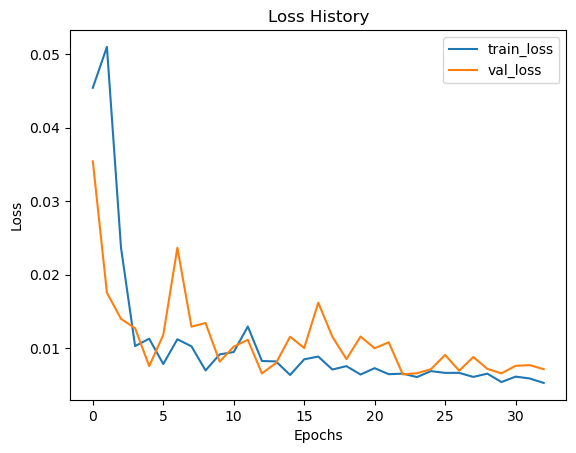

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

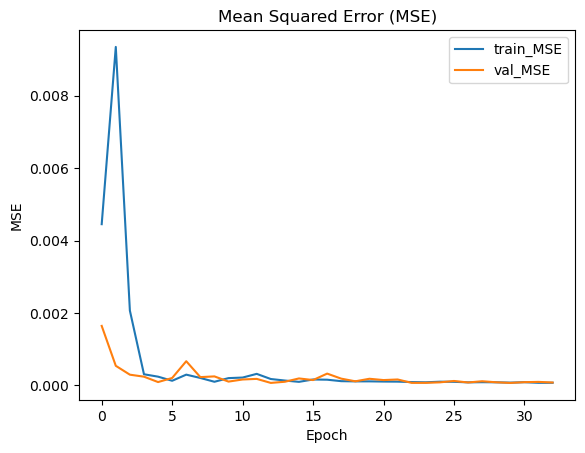

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

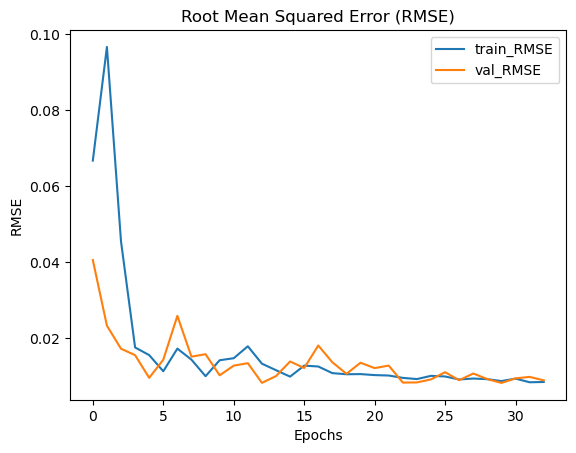

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

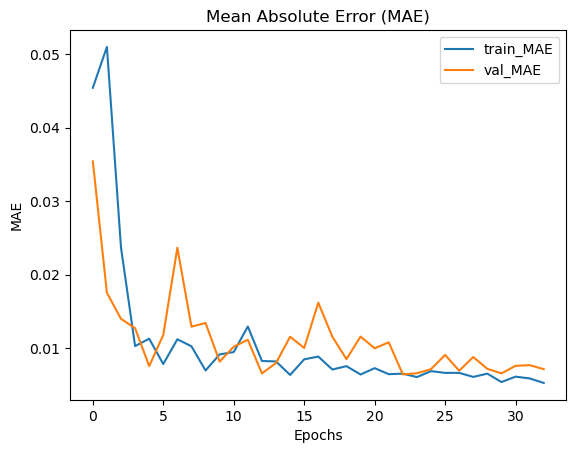

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

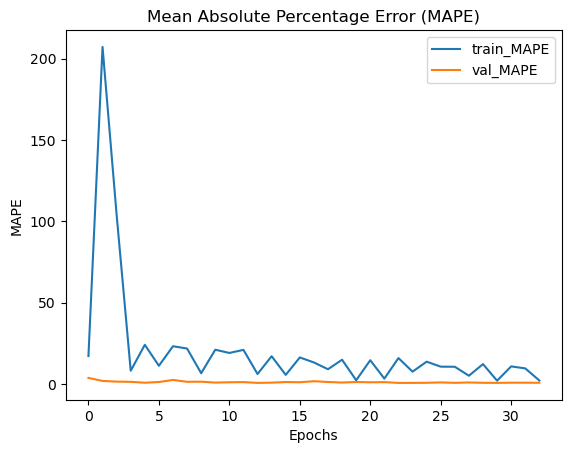

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 18:53:14.838652: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 4)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


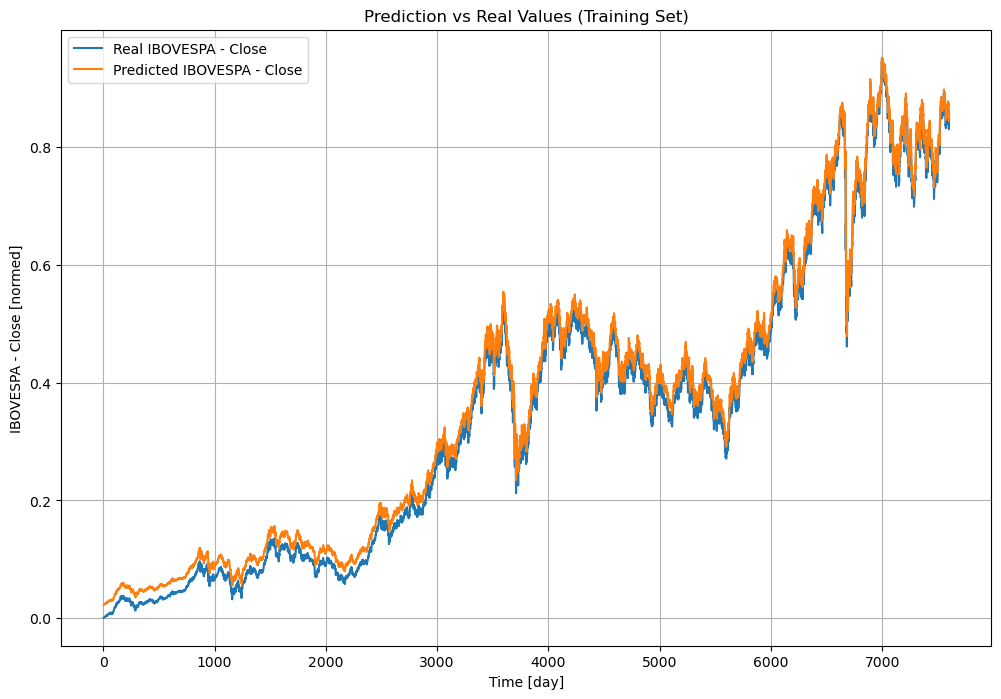

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


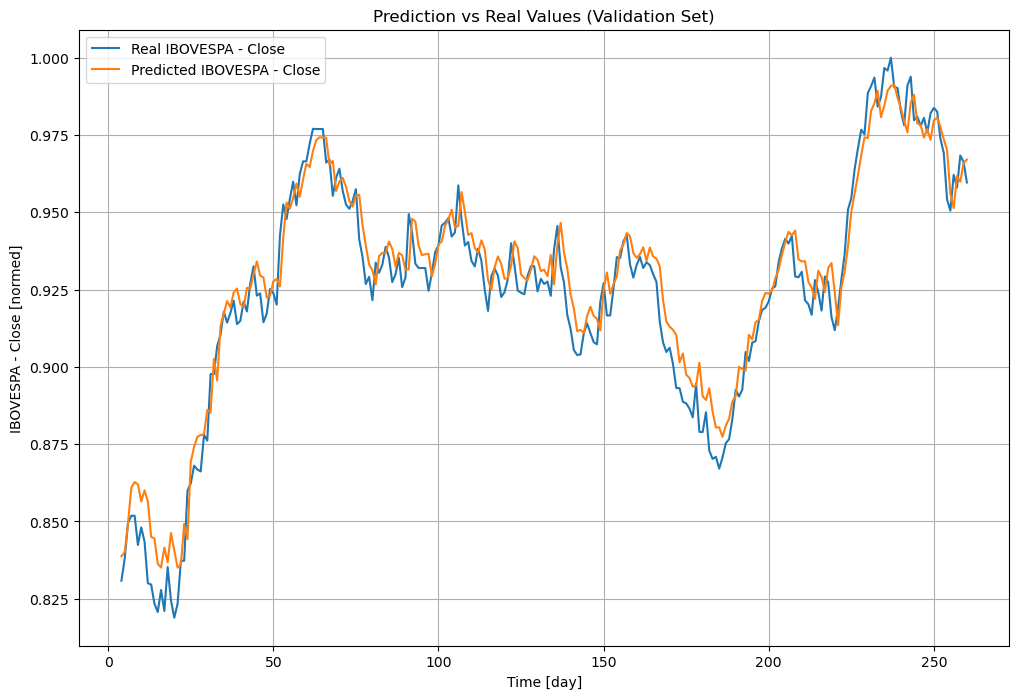

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


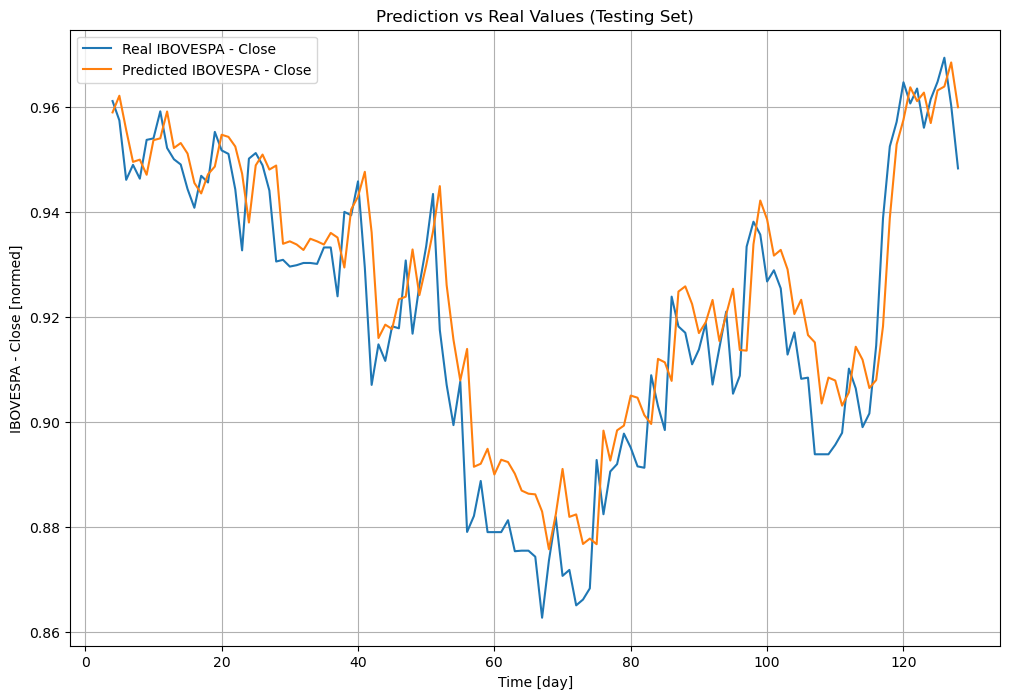

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

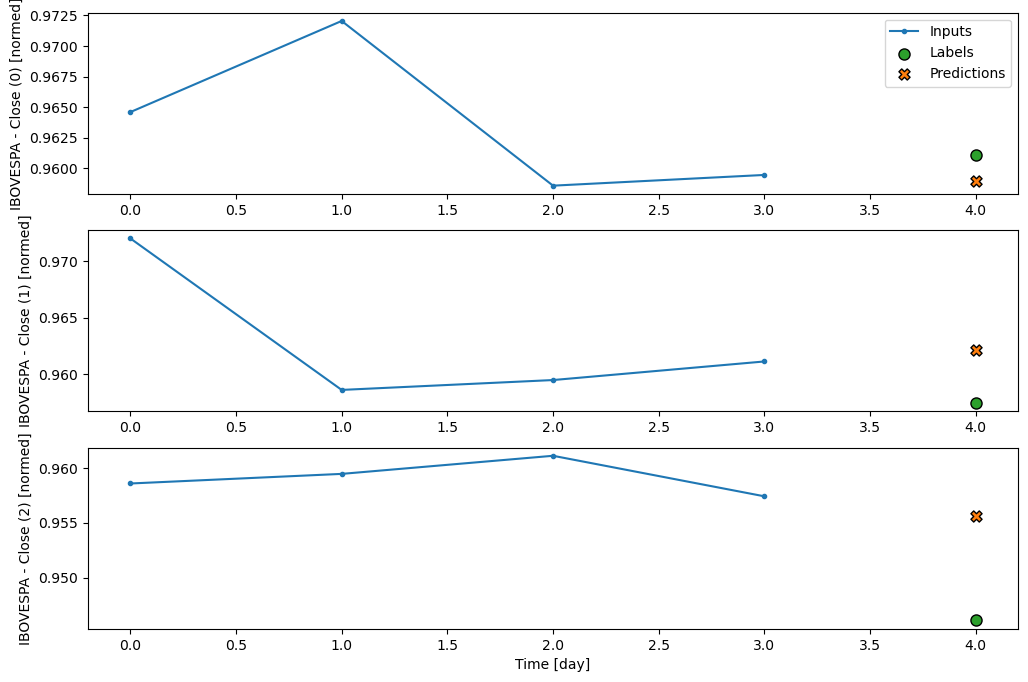

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:51s:580ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


array([[[0.95894855, 0.95894855, 0.95894855, ..., 0.95894855,
         0.95894855, 0.95894855]],

       [[0.96212566, 0.96212566, 0.96212566, ..., 0.96212566,
         0.96212566, 0.96212566]],

       [[0.9556028 , 0.9556028 , 0.9556028 , ..., 0.9556028 ,
         0.9556028 , 0.9556028 ]],

       ...,

       [[0.9638847 , 0.9638847 , 0.9638847 , ..., 0.9638847 ,
         0.9638847 , 0.9638847 ]],

       [[0.9684727 , 0.9684727 , 0.9684727 , ..., 0.9684727 ,
         0.9684727 , 0.9684727 ]],

       [[0.9599378 , 0.9599378 , 0.9599378 , ..., 0.9599378 ,
         0.9599378 , 0.9599378 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')